# People on AI:
# Sentiment Analysis of comments on Microsoft's AI announcement video

## Scraping the comments:

We use the Google API client library to get the comments and their replies from the video. For this, we need an API key from the Google Developers Console. We then use that and the video id of the Youtube video to scrape comments. The comments and their replies are added to a list named 'comments'.

In [1]:
#pip install google-api-python-client

We will use a csv file that already contains the comments, but the code given below can be used to scrape for comments to also get the recent ones

In [2]:
# from googleapiclient.discovery import build

# api_key = '##########'  # Substitute '##########' with your API key
# youtube = build('youtube', 'v3', developerKey=api_key)

# video_id = 'Bf-dbS9CcRU'

# comments = []
# next_page_token = None

# while True:
#     response = youtube.commentThreads().list(
#         part='snippet,replies',
#         videoId=video_id,
#         textFormat='plainText',
#         pageToken=next_page_token
#     ).execute()

#     for item in response['items']:
#         comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
#         comments.append(comment)

#         if 'replies' in item:
#             for reply_item in item['replies']['comments']:
#                 reply = reply_item['snippet']['textDisplay']
#                 comments.append(reply)

#                 if 'replies' in reply_item:
#                     for r in reply_item['replies']['comments']:
#                         r_text = r['snippet']['textDisplay']
#                         comments.append(r_text)

#     if 'nextPageToken' in response:
#         next_page_token = response['nextPageToken']
#     else:
#         break


In [3]:
# Creating a dataframe of the comments
# import pandas as pd
# df = pd.DataFrame(comments, columns = ['comment'])
# df

We save the data as a csv file to avoid scraping each time

In [4]:
# Saving the dataframe
#df.to_csv('comments.csv')

## Data Analysis

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('comments.csv')
df = df.iloc[:, 1:]
df

,comment
0,BLOWN!!!
1,This feels like one of the fake concept videos...
2,That will only serve to give them more work… I...
3,They can't possibly think any executive is goi...
4,Big day at the clickfarm it seems
...,...
1377,"Aprenda IA, faça curso, mestrado, doutorado na..."
1378,very futuristic \ni love you microsoft
1379,First
1380,Satya made Google dance 🕺


### Basic sentiment analysis using TextBlob

We do a basic sentiment analysis using Textblob without cleaning the data

In [6]:
#pip install TextBlob

In [7]:
from textblob import TextBlob
polarity = []
subjectivity = []
df2 = df.copy()

for i in range(len(df)):
    polarity.append(TextBlob(df['comment'][i]).sentiment.polarity)
    subjectivity.append(TextBlob(df['comment'][i]).sentiment.subjectivity)

df2['polarity'] = polarity
df2['subjectivity'] = subjectivity
df2

,comment,polarity,subjectivity
0,BLOWN!!!,0.000000,0.000000
1,This feels like one of the fake concept videos...,0.083333,0.750000
2,That will only serve to give them more work… I...,0.250000,0.750000
3,They can't possibly think any executive is goi...,-0.025000,0.481250
4,Big day at the clickfarm it seems,0.000000,0.100000
...,...,...,...
1377,"Aprenda IA, faça curso, mestrado, doutorado na...",0.000000,0.000000
1378,very futuristic \ni love you microsoft,0.350000,0.450000
1379,First,0.250000,0.333333
1380,Satya made Google dance 🕺,0.000000,0.000000


#### Here, the polarity is a measure of positivity. The value ranges from -1 to 1, where -1 is the most negative and 1 the most positive. 
#### The subjectivity measures how subjective the comments are, with 0 being the most objective to 1 being the most subjective.

In [8]:
df2.describe()

,polarity,subjectivity
count,1382.000000,1382.000000
mean,0.129178,0.396018
std,0.290859,0.331669
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.427922
75%,0.275000,0.641667
max,1.000000,1.000000


#### - The mean polarity is 0.129178, which says that the overall sentiment slightly leans towards the positive side.
#### - The standard deviation of the polarity is 0.290859, which shows that the sentiments are varied.
#### - The mean subjectivity of the comments is 0.396018, which shows that the comments are moderately opinionated.
#### - The standard deviation of the subjectivity is 0.331669, which shows that the subjectivity is quite varied.

#### Overall, the results from sentiment analysis using Textblob show us that the comments are slightly positive and moderately subjective, and there is a diverse range of sentiments and opinions expressed.

## Natural Language Processing with nltk

### Data Cleaning

#### Tokenization:

We split each comment into individual words or phrases, so that we may be able to analyze the text at a more granular level.

In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['tokenized_comment'] = df['comment'].apply(lambda x: word_tokenize(x))
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,comment,tokenized_comment
0,BLOWN!!!,"[BLOWN, !, !, !]"
1,This feels like one of the fake concept videos...,"[This, feels, like, one, of, the, fake, concep..."
2,That will only serve to give them more work… I...,"[That, will, only, serve, to, give, them, more..."
3,They can't possibly think any executive is goi...,"[They, ca, n't, possibly, think, any, executiv..."
4,Big day at the clickfarm it seems,"[Big, day, at, the, clickfarm, it, seems]"


#### Removing unnecessary characters:

We remove unnecessary characters like punctutations, special characters, and numbers.

In [10]:
import re
import string

def clean_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        # remove any punctuation from the token
        token = token.translate(str.maketrans('', '', string.punctuation))
        # remove any non-alphabetic characters from the token
        token = re.sub('[^A-Za-z]+', '', token)
        # convert the token to lowercase
        token = token.lower()
        cleaned_tokens.append(token)
    return cleaned_tokens

df['cleaned_comment'] = df['tokenized_comment'].apply(lambda x: clean_text(x))

df.head()

,comment,tokenized_comment,cleaned_comment
0,BLOWN!!!,"[BLOWN, !, !, !]","[blown, , , ]"
1,This feels like one of the fake concept videos...,"[This, feels, like, one, of, the, fake, concep...","[this, feels, like, one, of, the, fake, concep..."
2,That will only serve to give them more work… I...,"[That, will, only, serve, to, give, them, more...","[that, will, only, serve, to, give, them, more..."
3,They can't possibly think any executive is goi...,"[They, ca, n't, possibly, think, any, executiv...","[they, ca, nt, possibly, think, any, executive..."
4,Big day at the clickfarm it seems,"[Big, day, at, the, clickfarm, it, seems]","[big, day, at, the, clickfarm, it, seems]"


#### Removing stopwords:

Stopwords are common words that don't add much meaning to the sentiment. We remove them from the cleaned comments.

In [11]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply the remove_stopwords function to the cleaned_comment column
df['stopword_removed'] = df['cleaned_comment'].apply(remove_stopwords)
df.head()

,comment,tokenized_comment,cleaned_comment,stopword_removed
0,BLOWN!!!,"[BLOWN, !, !, !]","[blown, , , ]","[blown, , , ]"
1,This feels like one of the fake concept videos...,"[This, feels, like, one, of, the, fake, concep...","[this, feels, like, one, of, the, fake, concep...","[feels, like, one, fake, concept, videos, used..."
2,That will only serve to give them more work… I...,"[That, will, only, serve, to, give, them, more...","[that, will, only, serve, to, give, them, more...","[serve, give, work, , think, make, childhood, ..."
3,They can't possibly think any executive is goi...,"[They, ca, n't, possibly, think, any, executiv...","[they, ca, nt, possibly, think, any, executive...","[ca, nt, possibly, think, executive, going, pa..."
4,Big day at the clickfarm it seems,"[Big, day, at, the, clickfarm, it, seems]","[big, day, at, the, clickfarm, it, seems]","[big, day, clickfarm, seems]"


#### Stemming:

We convert each word to it's root form.

In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['stemmed_comment'] = df['stopword_removed'].apply(lambda x: [stemmer.stem(word) for word in x])
df.head()

,comment,tokenized_comment,cleaned_comment,stopword_removed,stemmed_comment
0,BLOWN!!!,"[BLOWN, !, !, !]","[blown, , , ]","[blown, , , ]","[blown, , , ]"
1,This feels like one of the fake concept videos...,"[This, feels, like, one, of, the, fake, concep...","[this, feels, like, one, of, the, fake, concep...","[feels, like, one, fake, concept, videos, used...","[feel, like, one, fake, concept, video, use, s..."
2,That will only serve to give them more work… I...,"[That, will, only, serve, to, give, them, more...","[that, will, only, serve, to, give, them, more...","[serve, give, work, , think, make, childhood, ...","[serv, give, work, , think, make, childhood, d..."
3,They can't possibly think any executive is goi...,"[They, ca, n't, possibly, think, any, executiv...","[they, ca, nt, possibly, think, any, executive...","[ca, nt, possibly, think, executive, going, pa...","[ca, nt, possibl, think, execut, go, pay, prof..."
4,Big day at the clickfarm it seems,"[Big, day, at, the, clickfarm, it, seems]","[big, day, at, the, clickfarm, it, seems]","[big, day, clickfarm, seems]","[big, day, clickfarm, seem]"


### Sentiment Analysis

We will be using the 'stemmed_comment' column to do our analysis.

In [13]:
df = df.iloc[:,-1:] 
df['stemmed_comment'] = df['stemmed_comment'].apply(lambda x: ' '.join(x))
df.head()

,stemmed_comment
0,blown
1,feel like one fake concept video use see year ...
2,serv give work think make childhood dream com...
3,ca nt possibl think execut go pay profession d...
4,big day clickfarm seem


#### We will now use the SentimentIntensityAnalyzer from nltk to do a sentiment analysis:

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df.loc[:, 'sentiment_scores'] = df['stemmed_comment'].apply(sia.polarity_scores)

df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df

,stemmed_comment,neg,neu,pos,compound
0,blown,0.000,1.000,0.000,0.0000
1,feel like one fake concept video use see year ...,0.145,0.607,0.248,0.2960
2,serv give work think make childhood dream com...,0.000,0.593,0.407,0.5859
3,ca nt possibl think execut go pay profession d...,0.055,0.945,0.000,-0.1027
4,big day clickfarm seem,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
1377,aprenda ia faa curso mestrado doutorado na rea,0.000,1.000,0.000,0.0000
1378,futurist love microsoft,0.000,0.323,0.677,0.6369
1379,first,0.000,1.000,0.000,0.0000
1380,satya made googl danc,0.000,1.000,0.000,0.0000


Here, the 'neg', 'neu', and 'pos' columns give us the negative, neutral, and positive sentiment scores respectively. <br>
The 'compound' column gives the overall sentiment score in a range of -1 to 1, where -1 is extremely negative and 1 is extremely positive.<br>
The compound score takes into consideration the polarity and intensity, and normalises them to get the score.

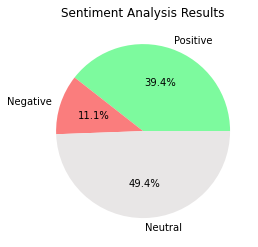

In [15]:
import matplotlib.pyplot as plt

positive = len(df[df['compound'] > 0])
negative = len(df[df['compound'] < 0])
neutral = len(df[df['compound'] == 0])

plt.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], 
        autopct='%1.1f%%', colors=['#7dfa9e', '#fa7d7d', '#e8e6e6'])
plt.title('Sentiment Analysis Results')
plt.show()

In [16]:
df.describe()

,neg,neu,pos,compound
count,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.043774,0.798162,0.142135,0.159371
std,0.121618,0.254913,0.214496,0.344743
min,0.000000,0.000000,0.000000,-0.913600
25%,0.000000,0.663250,0.000000,0.000000
50%,0.000000,0.881500,0.000000,0.000000
75%,0.000000,1.000000,0.248000,0.421500
max,1.000000,1.000000,1.000000,0.972300


#### Here, the mean of the 'neg' column is 0.043774 and the median is 0. This shows that the negative sentiment is quite low.<br>
#### The mean of the 'neu' column is 0.798162 and the median is 0.881500. This shows that the comments are highly neutral, for the most part.<br>
#### The mean and median of the 'pos' column are 0.142135 and 0 respectively. This shows that the comments lean slighltly towards the positive side.<br>
#### The 'compound' column has a mean of 0.159371 and a median of 0, which tells us that the overall sentiment of the comment thread is slightly positive. The standard deviation is 0.344743, which shows that the sentiments are varied.